# MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = '../../'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Hago directamente regresion logistica porque esta muy testado en leadscoring.

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}]

### Optimizar los hiper parámetros

####  Con grid search

hago grid porque solo hay un algoritmo y ademas pocos datos

In [7]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

/Users/stevenallus/miniconda3/envs/leadscoring/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/stevenallus/miniconda3/envs/leadscoring/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/stevenallus/miniconda3/envs/leadscoring/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/stevenallus/miniconda3/envs/leadscoring/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/stevenallus/miniconda3/envs/leadscoring/l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
19,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",1,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.86,0.86,0.86,0.86,0.00,1
15,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.75,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.86,0.86,0.86,0.86,0.00,1
11,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.50,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.86,0.86,0.86,0.86,0.00,1
7,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.25,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.86,0.86,0.86,0.86,0.00,1
17,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",1,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.85,0.86,0.86,0.86,0.00,5
13,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.85,0.86,0.86,0.86,0.00,6
9,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.85,0.86,0.86,0.86,0.00,7
18,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",1,-1,l2,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.85,0.86,0.86,0.86,0.00,8
5,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.25,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.85,0.86,0.86,0.86,0.00,9
14,0.01,0.00,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.85,0.86,0.86,0.86,0.00,10


## EVALUAR

### Predecir sobre validación

In [8]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [9]:
roc_auc_score(val_y, pred)

0.8813132694938441

Me tiene que salir algo parecido al mean_test_score anterior, si sale ligeramente mejor o peor no dice nada, solo se confirma que esta bien. Si sale muy diferente es que esta sobreajustado

Me da 0.88 y en el mean_test_score sale 0.86

Esta bien

### Examinar el mejor modelo

Mejor modelo y mejores parametros en ese modelo

In [10]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0.25, n_jobs=-1, penalty='none',
                                    solver='saga'))])

## REPORTING DEL MODELO

### Gain Chart

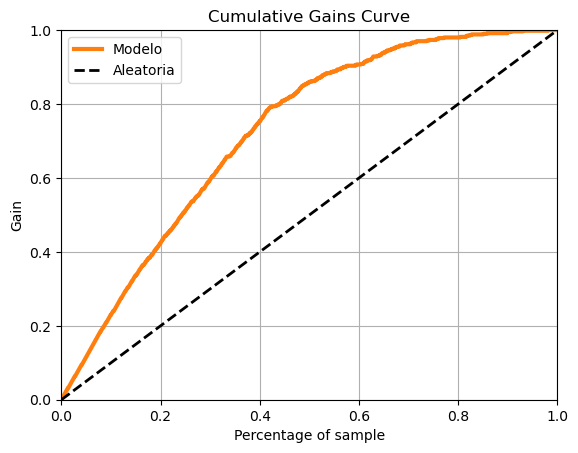

In [12]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

for line in ax.lines[:1]: 
    line.remove()


plt.legend(labels=['Modelo', 'Aleatoria']);

### Lift Chart

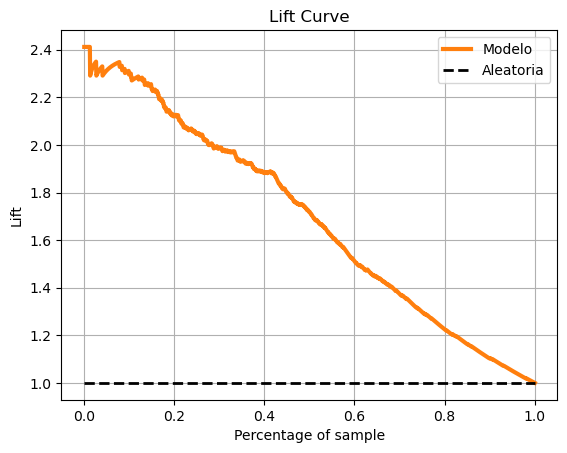

In [13]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 


for line in ax.lines[:1]:
    line.remove()


plt.legend(labels = ['Modelo','Aleatoria']);

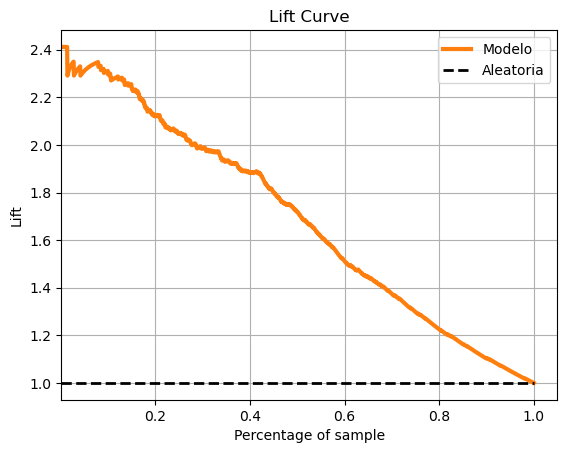

In [14]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

for line in ax.lines[:1]:
    line.remove()

plt.legend(labels=['Modelo', 'Aleatoria'])


ax.set_xlim(left=0.001);


### ROC Chart

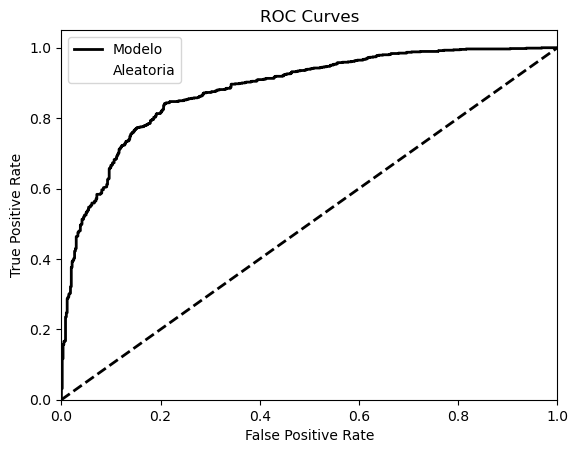

In [15]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

ax.lines[0].set_visible(True)
ax.lines[1].set_visible(False)
ax.lines[2].set_visible(False)
ax.lines[3].set_visible(False)



plt.legend(labels = ['Modelo','Aleatoria']);

Hago un examen de cuales son las variables que funcionan mejor

In [16]:
modelo.best_estimator_.named_steps.algoritmo.coef_

array([[ 3.97035217,  8.25447772,  1.05951867,  2.53752754,  1.92565886,
        -3.28215763,  1.59234302, -0.5030903 , -1.5867274 , -1.84708095,
        -0.91271823, -0.93559975, -0.05333823,  0.67822999]])

Como tengo los datos estandarizados, puedo usar los coeficientes para compararlos de manera relativa,

In [17]:
#Para ver el nombre de las variables
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'ult_actividad_SMS Sent', 'visitas_total_mms',
       'ocupacion_Working Professional', 'paginas_vistas_visita_mms',
       'score_perfil_mms', 'ambito_Select',
       'ult_actividad_Chat Conversation',
       'ult_actividad_Converted to Lead', 'ocupacion_Unemployed',
       'ult_actividad_Page Visited on Website',
       'ambito_Finance Management', 'descarga_lm_No'], dtype=object)

In [18]:
pd.DataFrame(data=modelo.best_estimator_.named_steps.algoritmo.coef_,
            columns=modelo.best_estimator_.named_steps.algoritmo.feature_names_in_).unstack().sort_values(ascending=False)

score_actividad_mms                    0    8.25
tiempo_en_site_total_mms               0    3.97
visitas_total_mms                      0    2.54
ocupacion_Working Professional         0    1.93
score_perfil_mms                       0    1.59
ult_actividad_SMS Sent                 0    1.06
descarga_lm_No                         0    0.68
ambito_Finance Management              0   -0.05
ambito_Select                          0   -0.50
ocupacion_Unemployed                   0   -0.91
ult_actividad_Page Visited on Website  0   -0.94
ult_actividad_Chat Conversation        0   -1.59
ult_actividad_Converted to Lead        0   -1.85
paginas_vistas_visita_mms              0   -3.28
dtype: float64

El score que calcula la empresa parece muy predictivo, el que menos prevee es paginas_vistas_visita_mms pero parece extraño es como el que esta menos correlacionado, pero no tiene sentido, quizas es que todavia hay variables muy correlacionads entre si.